In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly as ply

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler

#from ydata_profiling import ProfileReport
#from ucimlrepo import fetch_ucirepo



In [290]:
heart = pd.read_csv('heart.csv')

In [292]:
df = pd.DataFrame(heart)

In [294]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [296]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [298]:
print(df.describe())
print(df.head(1))
print(df.tail(1))

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [300]:
df.shape

(303, 14)

In [302]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [304]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

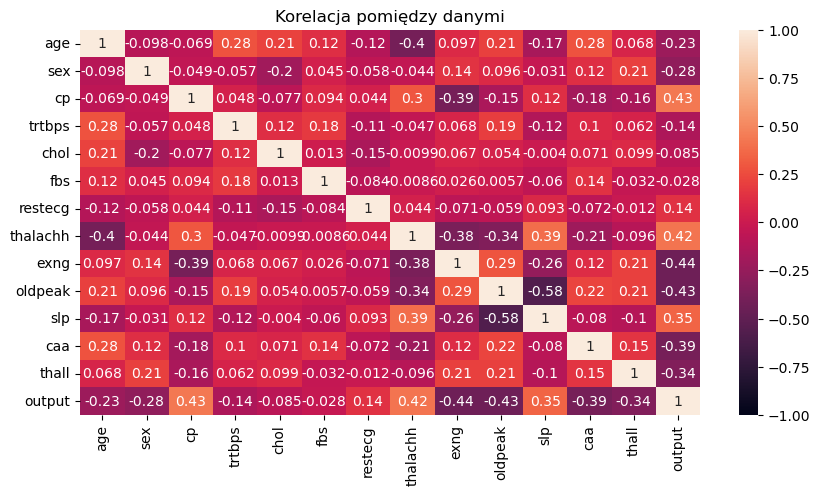

In [455]:
plt.figure(figsize=(10, 5))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
sns.color_palette("rocket", as_cmap=True)
plt.title('Korelacja pomiędzy danymi')
plt.show()

<Axes: title={'center': 'Rozkład wieku w zbiorze'}, xlabel='Wiek', ylabel='Częstotliwość'>

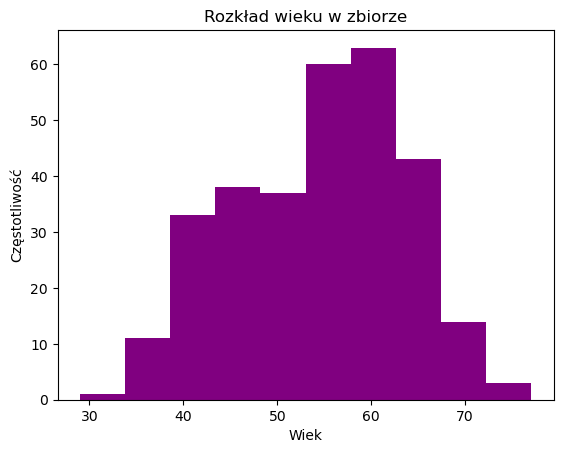

In [307]:
df["age"].plot(kind = 'hist', title='Rozkład wieku w zbiorze', xlabel='Wiek', ylabel='Częstotliwość', color = 'purple')

In [308]:
df["cp"].value_counts().count()

4

In [309]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [311]:
df["restecg"].value_counts().count()

3

In [312]:
df["restecg"].value_counts()

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [318]:
df["age"].max()

77

In [319]:
df["age"].min()

29

In [320]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [324]:
df["fbs"].value_counts()

fbs
0    258
1     45
Name: count, dtype: int64

In [326]:
df["exng"].value_counts()

exng
0    204
1     99
Name: count, dtype: int64

In [328]:
df["slp"].value_counts()

slp
2    142
1    140
0     21
Name: count, dtype: int64

In [330]:
df["caa"].value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [332]:
df["thall"].value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [334]:
df["output"].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [336]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

In [389]:
wartnum = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

In [340]:
wartkat = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

In [342]:
wartkat

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [344]:
wartnum
  

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

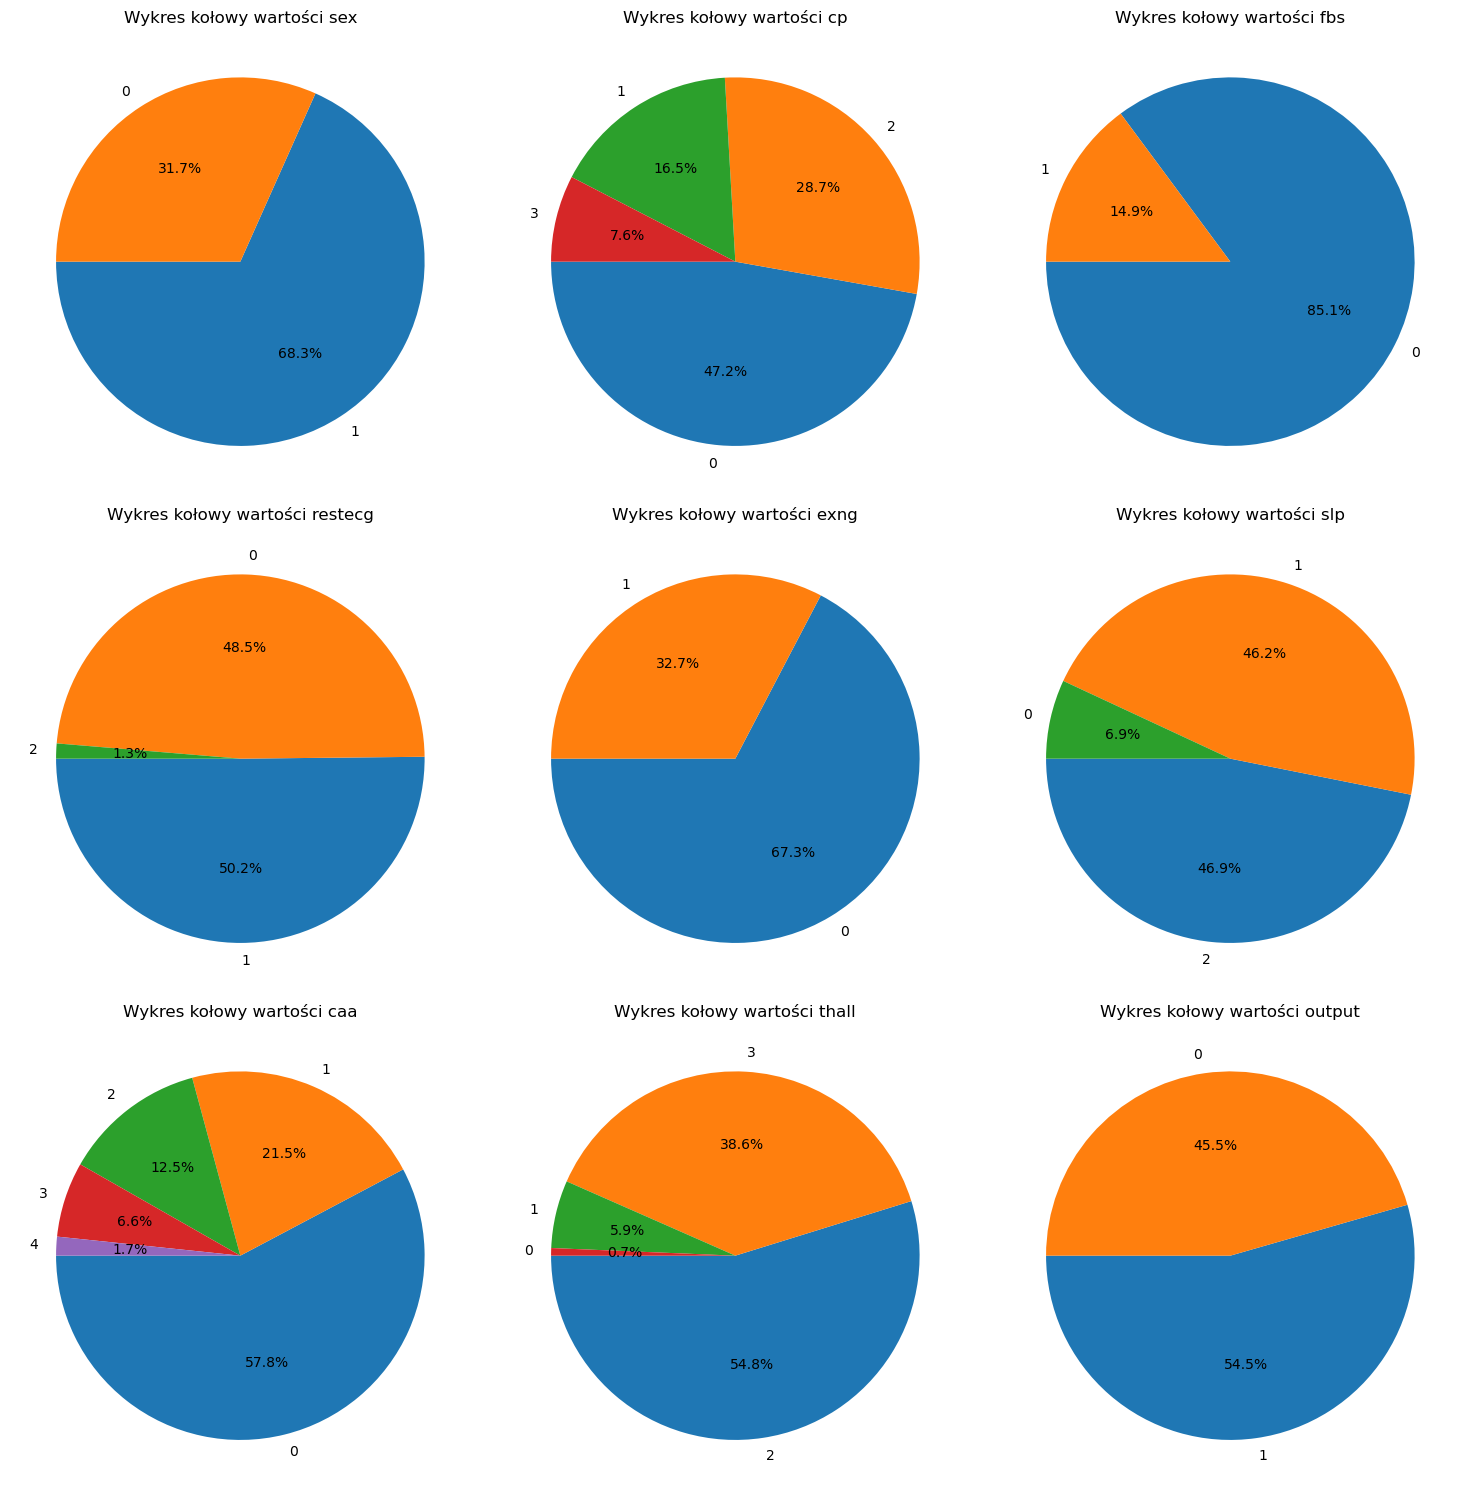

In [346]:
num_cols = len(wartkat)
num_rows = (num_cols + 2) // 2  

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(wartkat):
    value_counts = df[column].value_counts(normalize=True) * 100
    labels = value_counts.index
    sizes = value_counts.values

    
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=180)
    axes[i].set_title(f'Wykres kołowy wartości {column}')


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Rozkład ciśnienia spoczynkowego krwi podanego w mm Hg w zbiorze'}, xlabel='Ciśnienie', ylabel='Częstotliwość'>

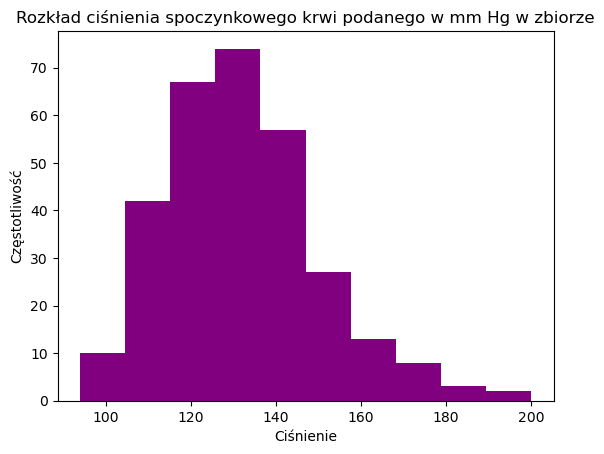

In [347]:
df["trtbps"].plot(kind = 'hist', title='Rozkład ciśnienia spoczynkowego krwi podanego w mm Hg w zbiorze', xlabel='Ciśnienie', ylabel='Częstotliwość', color = 'purple')

<Axes: title={'center': 'Rozkład poziomu cholesterolu podanego w mg/dl w zbiorze'}, xlabel='Poziom cholesterolu', ylabel='Częstotliwość'>

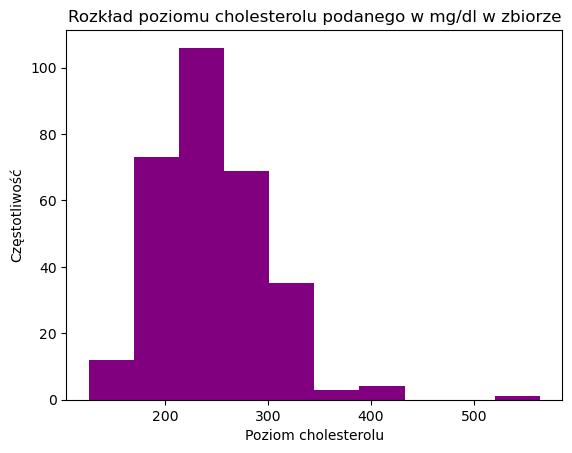

In [348]:
df["chol"].plot(kind = 'hist', title='Rozkład poziomu cholesterolu podanego w mg/dl w zbiorze', xlabel='Poziom cholesterolu', ylabel='Częstotliwość', color = 'purple')

<Axes: title={'center': 'Rozkład maksymalnego tętna pacjentów w zbiorze'}, xlabel='Maksymalne tętno', ylabel='Częstotliwość'>

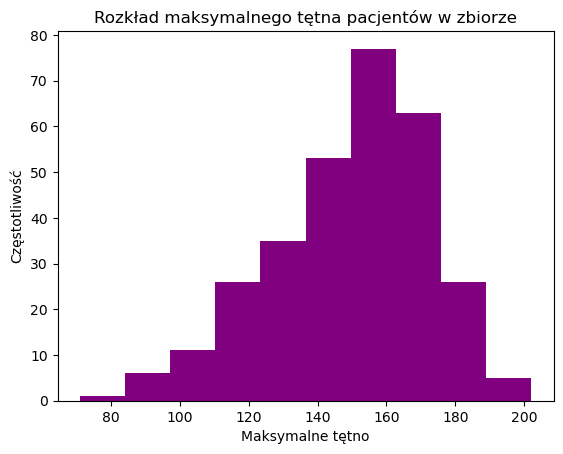

In [349]:
df["thalachh"].plot(kind = 'hist', title='Rozkład maksymalnego tętna pacjentów w zbiorze', xlabel='Maksymalne tętno', ylabel='Częstotliwość', color = 'purple')

<Axes: title={'center': 'Rozkład depresji ST wywołanej wysiłkiem w stosunku do odpoczynku w zbiorze'}, xlabel='Rodzaj depresji', ylabel='Częstotliwość'>

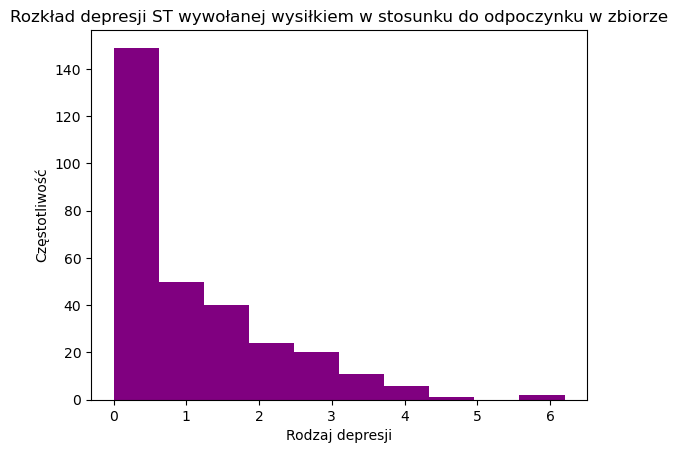

In [350]:
df["oldpeak"].plot(kind = 'hist', title='Rozkład depresji ST wywołanej wysiłkiem w stosunku do odpoczynku w zbiorze', xlabel='Rodzaj depresji', ylabel='Częstotliwość', color = 'purple')

In [351]:
numeric_axis_name = ["Wiek Pacjenta", "Ciśnienie spoczynkowe", "Cholesterol", "Maksymalne tętno pacjenta", "Depresja ST"]

In [353]:
list(zip(wartnum, numeric_axis_name))

[('age', 'Wiek Pacjenta'),
 ('trtbps', 'Ciśnienie spoczynkowe'),
 ('chol', 'Cholesterol'),
 ('thalachh', 'Maksymalne tętno pacjenta'),
 ('oldpeak', 'Depresja ST')]

In [355]:
categorical_axis_name = ["Płeć", "Bóle w klatce piersiowej", "Poziom cukru we krwi na czczo", "EKG spoczynkowe", "Dusznica wywołana ćwiczeniami", "Nachylenie segmentu ST", "Główne naczynia krwionośne zabarwione fluoroskopią", "Wynik testu talasu", "Ryzyko zawału"]

In [356]:
list(zip(wartkat, categorical_axis_name))

[('sex', 'Płeć'),
 ('cp', 'Bóle w klatce piersiowej'),
 ('fbs', 'Poziom cukru we krwi na czczo'),
 ('restecg', 'EKG spoczynkowe'),
 ('exng', 'Dusznica wywołana ćwiczeniami'),
 ('slp', 'Nachylenie segmentu ST'),
 ('caa', 'Główne naczynia krwionośne zabarwione fluoroskopią'),
 ('thall', 'Wynik testu talasu'),
 ('output', 'Ryzyko zawału')]

C:\Users\hanma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hanma\AppData\Local\Temp\ipykernel_25508\615653674.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


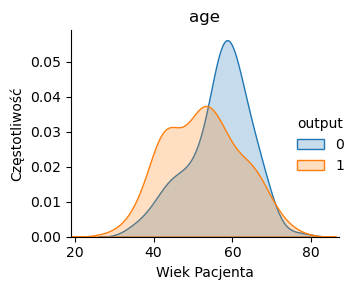

C:\Users\hanma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hanma\AppData\Local\Temp\ipykernel_25508\615653674.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


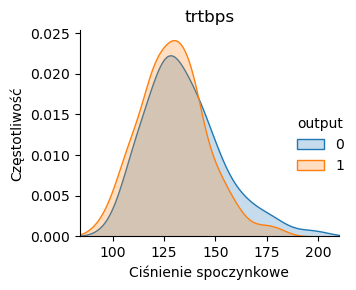

C:\Users\hanma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hanma\AppData\Local\Temp\ipykernel_25508\615653674.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


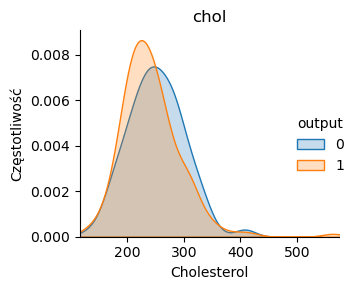

C:\Users\hanma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hanma\AppData\Local\Temp\ipykernel_25508\615653674.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


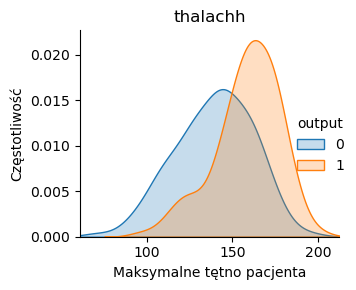

C:\Users\hanma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hanma\AppData\Local\Temp\ipykernel_25508\615653674.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


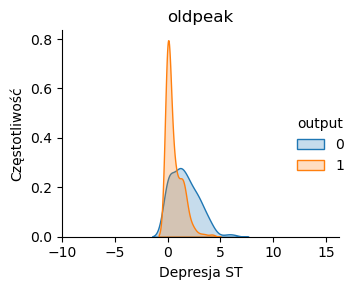

In [358]:
for i, z in list(zip(wartnum, numeric_axis_name)):
    graph = sns.FacetGrid(df[wartnum], hue="output", height=3, xlim=((df[i].min()-10), (df[i].max()+10))) 
    graph.map(sns.kdeplot, i, fill=True)
    graph.add_legend()                     
        
    plt.title(i) #fontdict=title_font)
    plt.xlabel(z) #fontdict=axis_font)
    plt.ylabel("Częstotliwość") #fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()

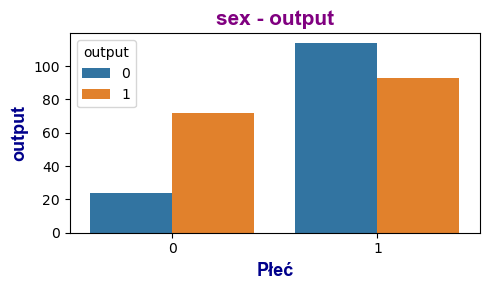

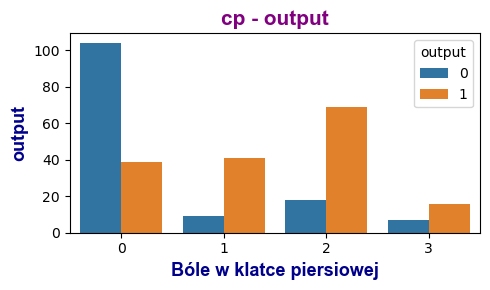

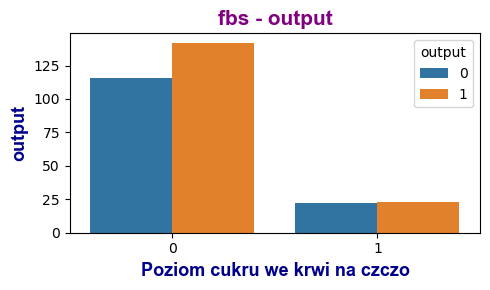

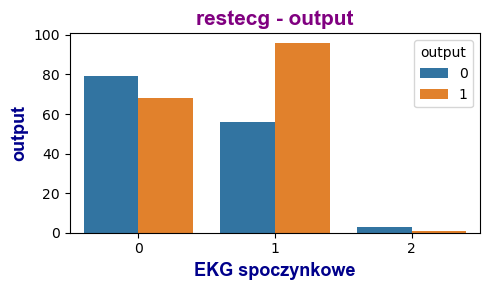

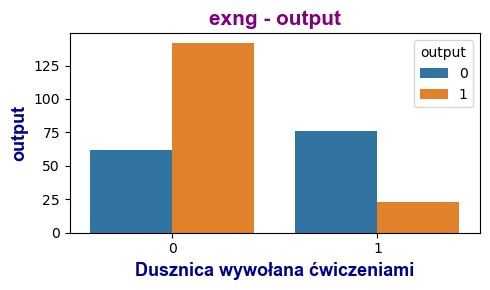

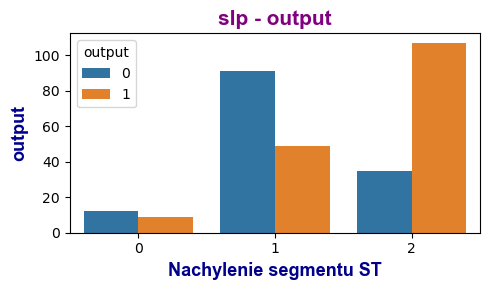

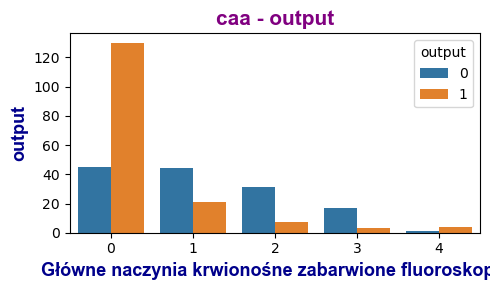

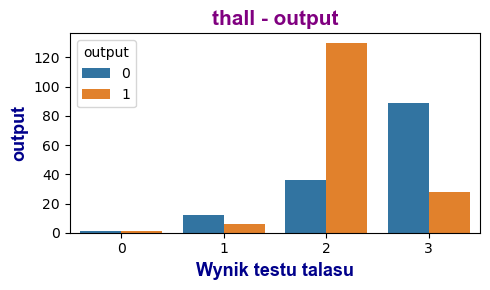

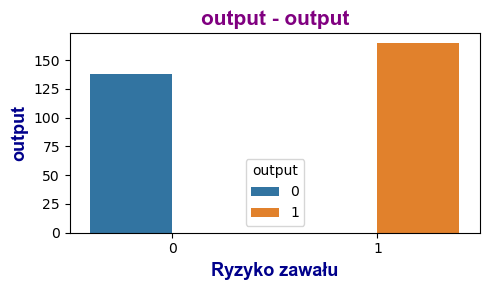

In [458]:
title_font = {"family" : "arial", "color" : "purple", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(wartkat, categorical_axis_name)):
    plt.figure(figsize = (5, 3))
    sns.countplot(x=i, data = df[wartkat], hue="output")
        
    plt.title(i + " - output", fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("output", fontdict=axis_font)
    
    plt.tight_layout()
    plt.show() 


In [391]:
robust_scaler = RobustScaler()

In [393]:
scaled_data = robust_scaler.fit_transform(df[wartnum])

In [395]:
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [397]:
df_scaled = pd.DataFrame(scaled_data, columns = wartnum)
df_scaled.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [399]:
df_scaled

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250
...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750
299,-0.740741,-1.00,0.377953,-0.646154,0.2500
300,0.962963,0.70,-0.740157,-0.369231,1.6250
301,0.148148,0.00,-1.716535,-1.169231,0.2500


In [460]:
df2 = pd.concat([df_scaled, df[wartkat]], axis=1)

In [462]:
df2.head()
df2["output"] = df["output"]

In [464]:
X = df2.drop(["output"], axis=1)
y = df2["output"]

In [466]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

In [468]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall
187,-0.074074,-0.3,0.409449,-1.353846,0.8750,1,0,0,0,1,1,1,3
31,0.740741,-0.5,-0.992126,-0.400000,-0.2500,1,0,0,1,0,2,0,3
203,0.962963,2.5,0.535433,-0.092308,0.5000,1,2,1,0,1,1,0,3
70,-0.074074,-0.5,0.283465,-0.184615,-0.2500,1,2,0,0,0,1,0,3
251,-0.888889,0.1,0.110236,-0.307692,-0.4375,1,0,1,0,1,1,4,3


In [470]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [472]:
y_train.head()
df2

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1,3,1,0,0,0,0,1,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1,2,0,1,0,0,0,2,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,0,1,0,0,0,2,0,2,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1,1,0,1,0,2,0,2,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,0.50,0.015748,-0.923077,-0.3750,0,0,0,1,1,1,0,3,0
299,-0.740741,-1.00,0.377953,-0.646154,0.2500,1,3,0,1,0,1,0,3,0
300,0.962963,0.70,-0.740157,-0.369231,1.6250,1,0,1,1,0,1,2,3,0
301,0.148148,0.00,-1.716535,-1.169231,0.2500,1,0,0,1,1,1,1,3,0


In [474]:
"output"

'output'

In [476]:
df["output"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [479]:
y_train.head()

187    0
31     1
203    0
70     1
251    0
Name: output, dtype: int64

In [481]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [483]:
#df2 = y_train

In [485]:
df["output"]

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [487]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [489]:
y_pred = log_reg.predict(X_test)

In [491]:
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [493]:
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {}".format(accuracy))

Test Accuracy: 0.8709677419354839


In [497]:
X = df2[df2.columns[1:-1]].to_numpy()
y = np.array(df2['output'].to_numpy())

In [499]:
classnames = df2["output"]

In [501]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [503]:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

y_test_pred = tree.predict(X_test)
y_train_pred = tree.predict(X_train)

print('Test:', accuracy_score(y_test, y_test_pred))
print('Train:', accuracy_score(y_train, y_train_pred))

Test: 0.6901408450704225
Train: 1.0


In [505]:
df2["output"] = df2["output"].map(str)

In [507]:
classnames = df2["output"]

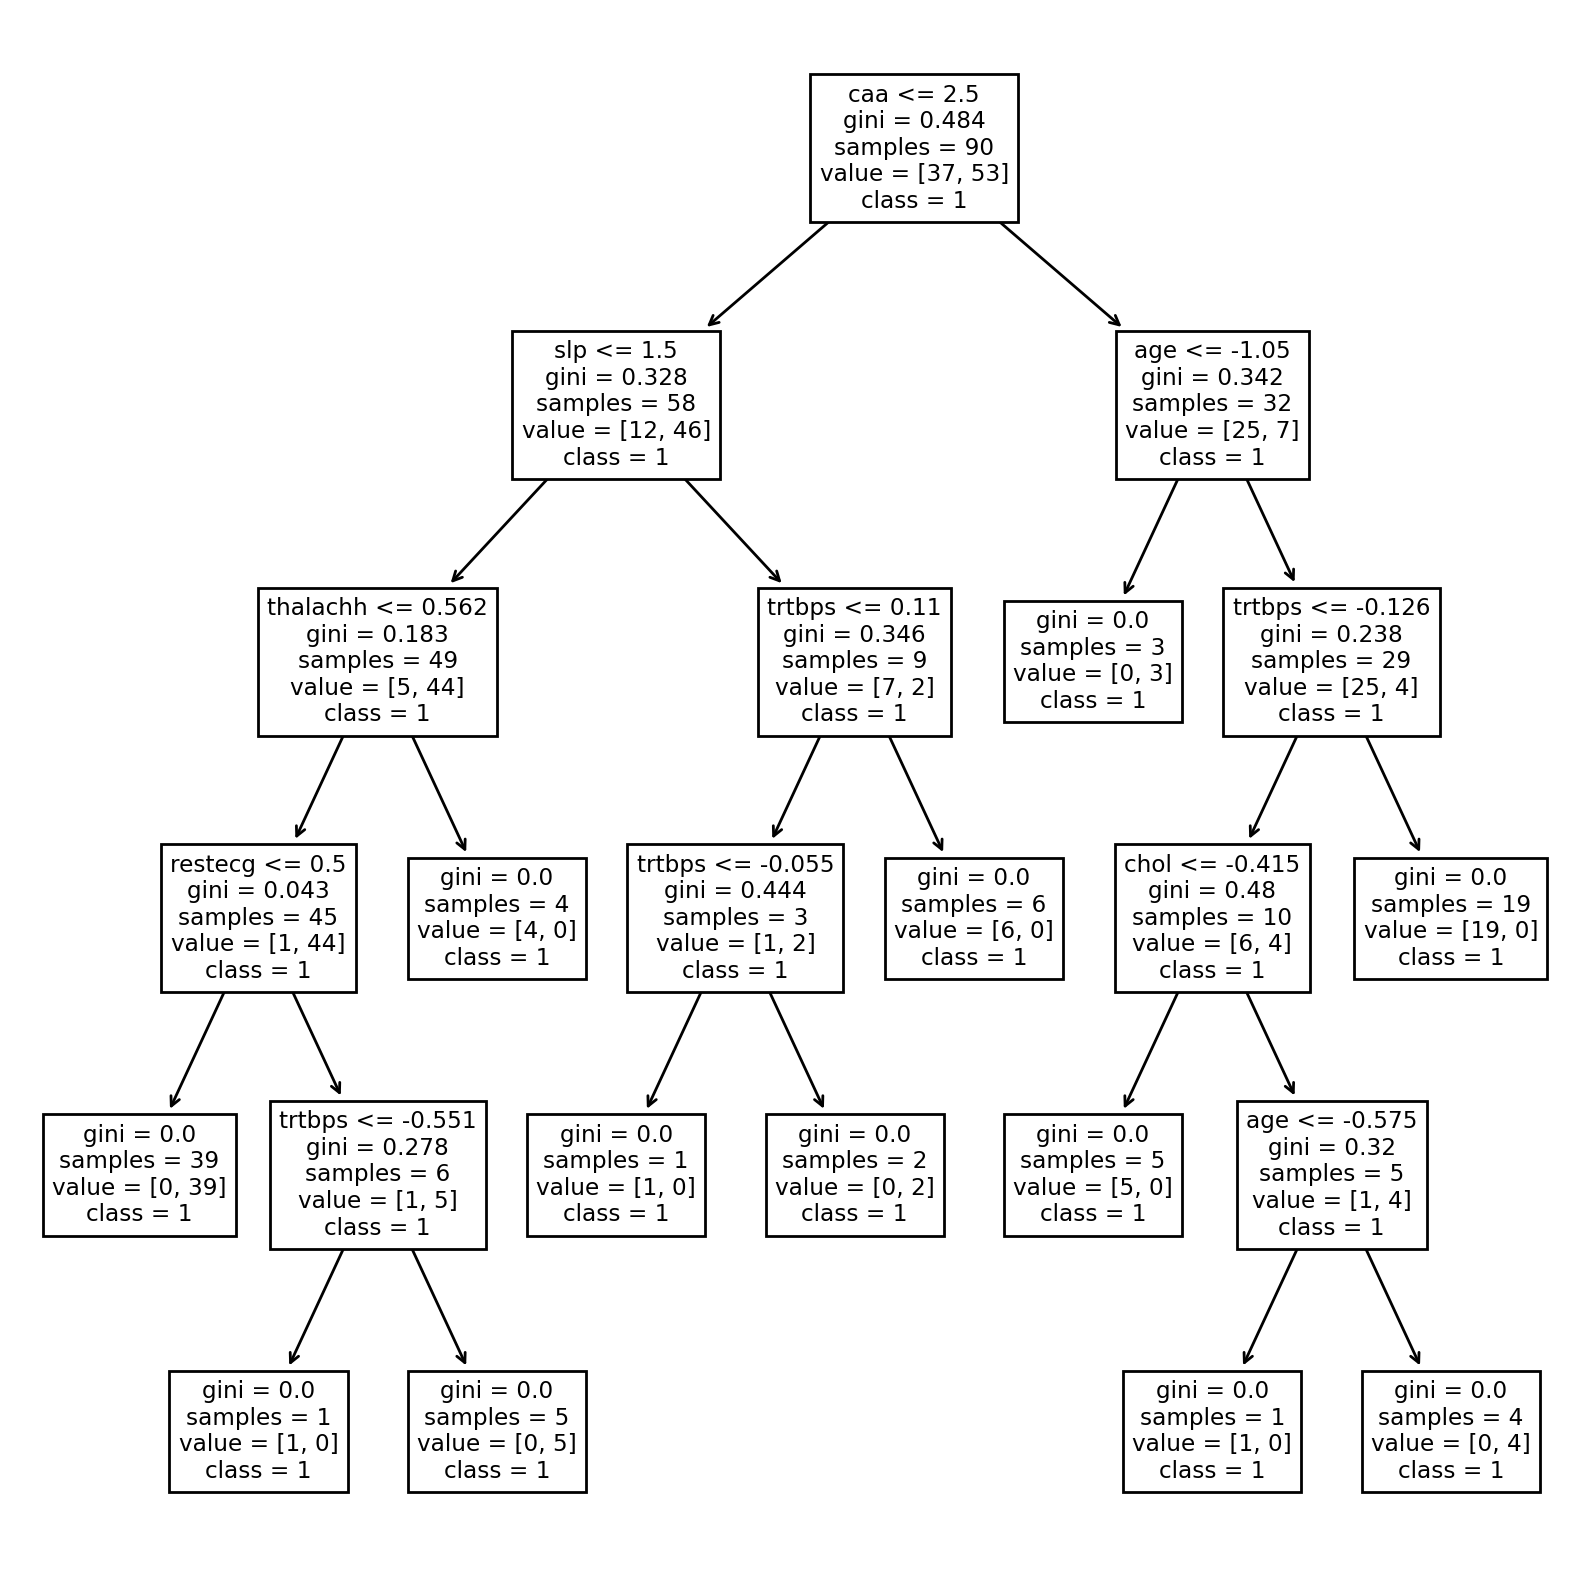

In [509]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=200)

plot_tree(tree,
          feature_names=df_new2.columns.tolist(),
          class_names=classnames.tolist(),
          ax=ax)
plt.show()

In [515]:
wartkat

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [517]:
wartnum

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [519]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [521]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print('Test:', accuracy_score(y_test, y_test_pred))
print('Train:', accuracy_score(y_train, y_train_pred))

Test: 0.8688524590163934
Train: 1.0


In [523]:
gs = GridSearchCV(knn,
                  param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15, 17],
                              'weights': ['uniform', 'distance']},
                  scoring='accuracy',
                  refit=True, 
                  return_train_score=True,
                  n_jobs=8) 
gs.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(weights='distance'), n_jobs=8,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15, 17],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

In [524]:
res = gs.cv_results_
columns = ['param_n_neighbors', 'param_weights', 'mean_test_score', 'mean_train_score']
df_res = pd.DataFrame({k: res[k] for k in columns})
df_res.round(3)

,param_n_neighbors,param_weights,mean_test_score,mean_train_score
0,3,uniform,0.773,0.891
1,3,distance,0.773,1.000
2,5,uniform,0.806,0.873
3,5,distance,0.802,1.000
4,7,uniform,0.793,0.842
5,7,distance,0.789,1.000
6,9,uniform,0.810,0.839
7,9,distance,0.810,1.000
8,11,uniform,0.810,0.836
9,11,distance,0.806,1.000


In [525]:
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

print('Test:', accuracy_score(y_test, y_test_pred))
print('Train:', accuracy_score(y_train, y_train_pred))

Test: 0.8688524590163934
Train: 1.0


In [526]:
gs = GridSearchCV(svc,
                  param_grid={'C': [0.001, 0.1, 1.0, 10, 100, 1000, 10000],
                              'kernel': ['linear']},
                  scoring='accuracy',
                  refit=True, 
                  return_train_score=True,
                  n_jobs=8) 
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=8,
             param_grid={'C': [0.001, 0.1, 1.0, 10, 100, 1000, 10000],
                         'kernel': ['linear']},
             return_train_score=True, scoring='accuracy')

In [530]:
res = gs.cv_results_
columns = ['param_C', 'param_kernel', 'mean_test_score', 'mean_train_score']
df_res = pd.DataFrame({k: res[k] for k in columns})
df_res.round(3)

,param_C,param_kernel,mean_test_score,mean_train_score
0,0.001,linear,0.521,0.521
1,0.1,linear,0.826,0.843
2,1.0,linear,0.810,0.857
3,10,linear,0.822,0.855
4,100,linear,0.822,0.855
5,1000,linear,0.822,0.855
6,10000,linear,0.822,0.855
